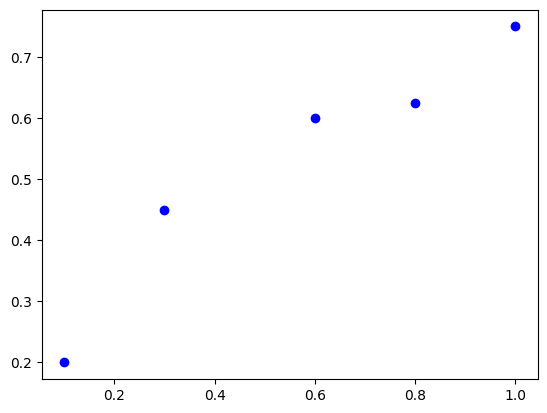

In [26]:
# Synthetic Data
X_cords = [.1,.3,.6,.8,1]
Y_cords = [.2,.45,.6,.625,.75]

import matplotlib.pyplot as plt
plt.scatter(X_cords, Y_cords, marker='o', color='b')
plt.show()

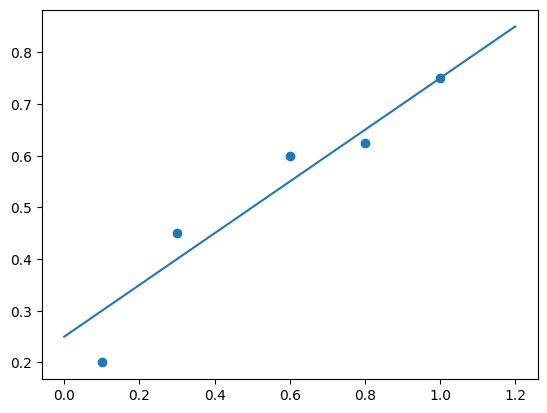

In [27]:
# Predicting outputs from features
import numpy as np
plt.scatter(X_cords, Y_cords)
# plot line
x_eq = np.linspace(0,1.2,100)
y_eq = 0.5*x_eq+.25
plt.plot(x_eq, y_eq, label="y = .5x + .25")

plt.show()

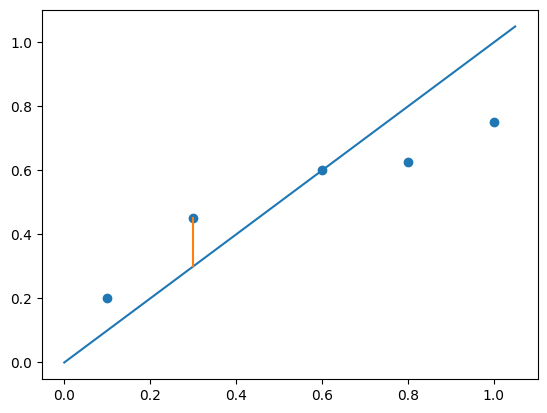

In [28]:
 m = 1
 b = 0
 x_eq = np.linspace(0, 1.05, 100)
 y_eq = m*x_eq+b
 plt.plot(x_eq, y_eq)

 plt.plot([X_cords[1], X_cords[1]], [Y_cords[1], m*X_cords[1] + b]) # basically line from X_cords[1], Y_cords[1] to the line
 plt.scatter(X_cords, Y_cords)

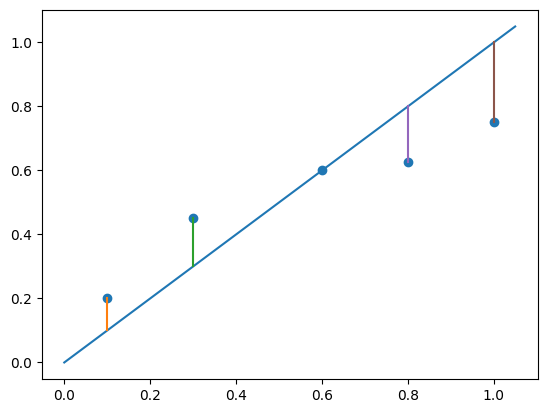

In [29]:
m=1
b=0
x_eq = np.linspace(0, 1.05, 100)
y_eq = m*x_eq+b
plt.plot(x_eq, y_eq)

for i in range(len(X_cords)):
  plt.plot([X_cords[i], X_cords[i]], [Y_cords[i], m*X_cords[i]+b])
plt.scatter(X_cords, Y_cords)

In [30]:
import torch
dtype = torch.float

class Linear_reg:
  def __init__(self, m, b):
    self.m = torch.tensor(m, requires_grad=True, dtype=dtype)
    self.b = torch.tensor(b, requires_grad=True, dtype=dtype)
  def forward(self, x):
    return self.m * x + self.b
  def ssr(self, y, y_hat):
    return torch.sum((y-y_hat)**2)
x_input = torch.tensor(X_cords, requires_grad=True, dtype=dtype)
y_observed = torch.tensor(Y_cords, requires_grad=True, dtype=dtype)

In [31]:
iterations = 40 # how many loops of training
loss_hist = [] # error hisory
b_hist=[] # update to b history


model = Linear_reg(m=.5, b=-.8)

#training model
for i in range(iterations):

  # forward pass
  y_hat = model.forward(x_input)

  # calculate loss
  loss = model.ssr(y_observed, y_hat)

  # store loss + b
  loss_hist.append(loss.item())
  b_hist.append(model.b.item())

  # increase b
  with torch.no_grad():
    model.b+=.05
  print(f'{i}, \t{loss.item():.4f}, \t{model.b.item():.4f}')

0, 	5.4756, 	-0.7500
1, 	4.9656, 	-0.7000
2, 	4.4806, 	-0.6500
3, 	4.0206, 	-0.6000
4, 	3.5856, 	-0.5500
5, 	3.1756, 	-0.5000
6, 	2.7906, 	-0.4500
7, 	2.4306, 	-0.4000
8, 	2.0956, 	-0.3500
9, 	1.7856, 	-0.3000
10, 	1.5006, 	-0.2500
11, 	1.2406, 	-0.2000
12, 	1.0056, 	-0.1500
13, 	0.7956, 	-0.1000
14, 	0.6106, 	-0.0500
15, 	0.4506, 	0.0000
16, 	0.3156, 	0.0500
17, 	0.2056, 	0.1000
18, 	0.1206, 	0.1500
19, 	0.0606, 	0.2000
20, 	0.0256, 	0.2500
21, 	0.0156, 	0.3000
22, 	0.0306, 	0.3500
23, 	0.0706, 	0.4000
24, 	0.1356, 	0.4500
25, 	0.2256, 	0.5000
26, 	0.3406, 	0.5500
27, 	0.4806, 	0.6000
28, 	0.6456, 	0.6500
29, 	0.8356, 	0.7000
30, 	1.0506, 	0.7500
31, 	1.2906, 	0.8000
32, 	1.5556, 	0.8500
33, 	1.8456, 	0.9000
34, 	2.1606, 	0.9500
35, 	2.5006, 	1.0000
36, 	2.8656, 	1.0500
37, 	3.2556, 	1.1000
38, 	3.6706, 	1.1500
39, 	4.1106, 	1.2000


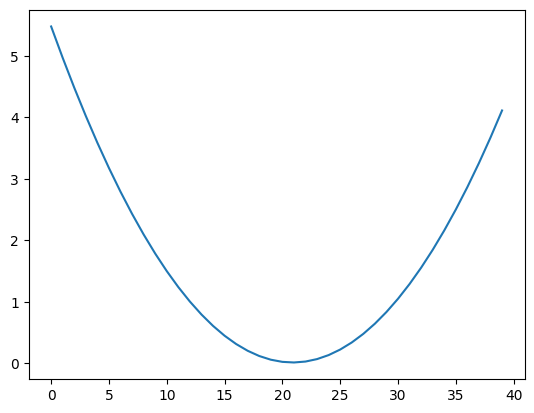

In [32]:
plt.plot(range(iterations), loss_hist)

In [33]:
# Gradient descent (layman): model has some loss that is visible to the engineer
# What do we do with the loss? Ans: we can use it to update the model
# Q: How do you do that?
# A: You can take the derivative i.e. minimize
# ex. y=x^3 -> dy= 2x- > 2x=0, x=0, d^2y=2


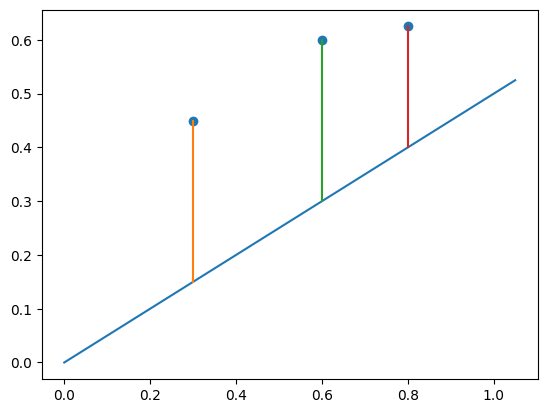

In [34]:
x_cords_sm = [.3,.6,.8]
y_cords_sm = [.45,.6,.625]
x_input_sm = torch.tensor(x_cords_sm)
y_obs_sm = torch.tensor(y_cords_sm)

# call class
model = Linear_reg(m=.5,b=0)

#get the model parameters
with torch.no_grad():
  m = model.m.detach().numpy()
  b = model.b.detach().numpy()

#plot line
x_eq = np.linspace(0, 1.05, 100)
y_eq = m*x_eq + b
plt.plot(x_eq, y_eq)

for i in range(len(x_cords_sm)):
  plt.plot([x_cords_sm[i], x_cords_sm[i]], [y_cords_sm[i], m*x_cords_sm[i]+b])
plt.scatter(x_cords_sm, y_cords_sm)

In [35]:
# use pytorch to calculate gradients
y_hat = model.forward(x_input_sm)

#calculate loss
loss = model.ssr(y_obs_sm, y_hat)


# derivative
loss.backward()

#print out the derivative
print(f'The calculated gradient: {model.b.grad:.4f}')

The calculated gradient: -1.6500


In [36]:
with torch.no_grad():
  lr=.1

  # store old b and m
  old_b = model.b.detach().numpy().copy()
  m = model.m.detach().numpy().copy()

  # update b
  model.b -= lr * model.b.grad

  # new b
  new_b = model.b.detach().numpy().copy()

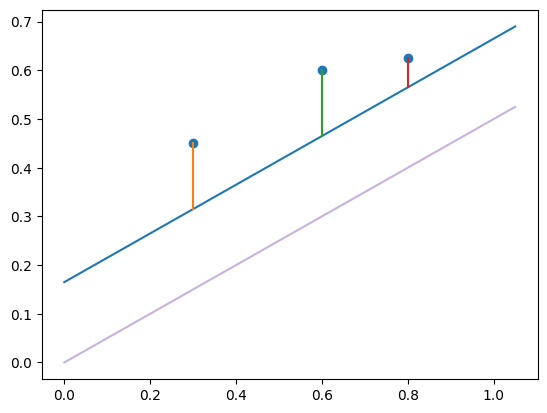

In [37]:
# plot again
x_eq = np.linspace(0,1.05, 100)
y_eq_1 = m*x_eq+new_b
plt.plot(x_eq, y_eq_1)

#residual
for i in range(len(x_cords_sm)):
  plt.plot([x_cords_sm[i], x_cords_sm[i]], [y_cords_sm[i], m*x_cords_sm[i]+b])

# plot line
x_eq = np.linspace(0,1.05,100)
y_eq_2 = m*x_eq + old_b
plt.plot(x_eq, y_eq_2, alpha=.5)

plt.scatter(x_cords_sm, y_cords_sm)


In [41]:
epochs = 50
loss_hist = []
b_hist = []
step_size = .01

model = Linear_reg(m=0, b=0)

for i in range(epochs):

  # forward pass
  y_hat = model.forward(x_input)

  # calculate loss
  loss = model.ssr(y_observed, y_hat)

  # store loss
  loss_hist.append(loss.item())

  #store b
  b_hist.append(model.b.item())

  #update parameter
  loss.backward()

  #update parameters
  with torch.no_grad():
    model.b -= step_size * model.b.grad

  #zero out gradients after one iteration
  model.b.grad.zero_()

  #print
  print(f'Epoch: {i}, \tLoss: {loss.item():.2f}, \tB: {model.b.item():.2f}')
b_hist.append(model.b.item())

Epoch: 0, 	Loss: 1.56, 	B: 0.05
Epoch: 1, 	Loss: 1.29, 	B: 0.10
Epoch: 2, 	Loss: 1.08, 	B: 0.14
Epoch: 3, 	Loss: 0.91, 	B: 0.18
Epoch: 4, 	Loss: 0.77, 	B: 0.21
Epoch: 5, 	Loss: 0.66, 	B: 0.25
Epoch: 6, 	Loss: 0.57, 	B: 0.27
Epoch: 7, 	Loss: 0.49, 	B: 0.30
Epoch: 8, 	Loss: 0.43, 	B: 0.32
Epoch: 9, 	Loss: 0.38, 	B: 0.34
Epoch: 10, 	Loss: 0.35, 	B: 0.36
Epoch: 11, 	Loss: 0.31, 	B: 0.38
Epoch: 12, 	Loss: 0.29, 	B: 0.39
Epoch: 13, 	Loss: 0.27, 	B: 0.40
Epoch: 14, 	Loss: 0.25, 	B: 0.42
Epoch: 15, 	Loss: 0.24, 	B: 0.43
Epoch: 16, 	Loss: 0.22, 	B: 0.44
Epoch: 17, 	Loss: 0.22, 	B: 0.45
Epoch: 18, 	Loss: 0.21, 	B: 0.45
Epoch: 19, 	Loss: 0.20, 	B: 0.46
Epoch: 20, 	Loss: 0.20, 	B: 0.47
Epoch: 21, 	Loss: 0.19, 	B: 0.47
Epoch: 22, 	Loss: 0.19, 	B: 0.48
Epoch: 23, 	Loss: 0.19, 	B: 0.48
Epoch: 24, 	Loss: 0.19, 	B: 0.49
Epoch: 25, 	Loss: 0.18, 	B: 0.49
Epoch: 26, 	Loss: 0.18, 	B: 0.49
Epoch: 27, 	Loss: 0.18, 	B: 0.50
Epoch: 28, 	Loss: 0.18, 	B: 0.50
Epoch: 29, 	Loss: 0.18, 	B: 0.50
Epoch: 30, 	Loss: 0.

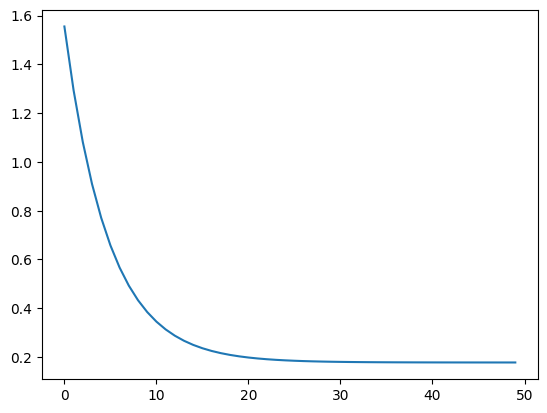

In [42]:
plt.plot(range(epochs), loss_hist)